<a href="https://colab.research.google.com/github/naufaldi001/Data-Analyst-Career-Track/blob/main/Data_Visualization_with_Python_Matplotlib_for_Beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')


In [ ]:
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id  ...    brand quantity item_price
0   1703458  2019-10-17        14004  ...  BRAND_J       10     740000
1   1706815  2019-10-24        17220  ...  BRAND_R        2     604000
2   1710718  2019-11-03        16518  ...  BRAND_C        8    1045000
3   1683592  2019-08-19        16364  ...  BRAND_A        4     205000
4   1702573  2019-10-16        15696  ...  BRAND_R        2    4475000

[5 rows x 9 columns]


In [ ]:
#Penambahan Kolom Order Month pada Dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

   order_id  order_date  customer_id  ... quantity item_price order_month
0   1703458  2019-10-17        14004  ...       10     740000     2019-10
1   1706815  2019-10-24        17220  ...        2     604000     2019-10
2   1710718  2019-11-03        16518  ...        8    1045000     2019-11
3   1683592  2019-08-19        16364  ...        4     205000     2019-08
4   1702573  2019-10-16        15696  ...        2    4475000     2019-10

[5 rows x 10 columns]




*   apply & lambda biasa digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda x: x*2) berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja
*   Function datetime.datetime.strptime digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.


*  Function strftime digunakan untuk mengubah format suatu data bertipe datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti output-nya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada. 






In [ ]:
#Penambahan Kolom GMV pada Dataset
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:
   order_id  order_date  customer_id  ... item_price order_month      gmv
0   1703458  2019-10-17        14004  ...     740000     2019-10  7400000
1   1706815  2019-10-24        17220  ...     604000     2019-10  1208000
2   1710718  2019-11-03        16518  ...    1045000     2019-11  8360000
3   1683592  2019-08-19        16364  ...     205000     2019-08   820000
4   1702573  2019-10-16        15696  ...    4475000     2019-10  8950000

[5 rows x 11 columns]


In [ ]:
#Membuat Data Agregat
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


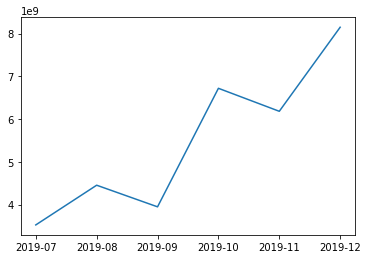

In [ ]:
#Membuat Line Chart Trend Pertumbuhan GMV
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

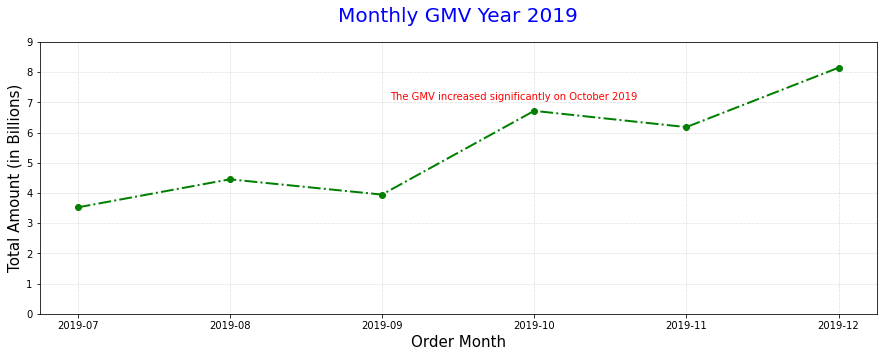

In [ ]:
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.show()

color: mengubah warnanya (sama seperti di title)
linewidth: mengubah ketebalan line/garisnya (dalam satuan px)
linestyle: mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.
marker: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.

Agar hasilnya lebih lengkap lagi, Kita akan menggali lebih dalam, apa yang membuat GMV ini meningkat? Agar kita bisa menentukan strategi bisnis kedepannya

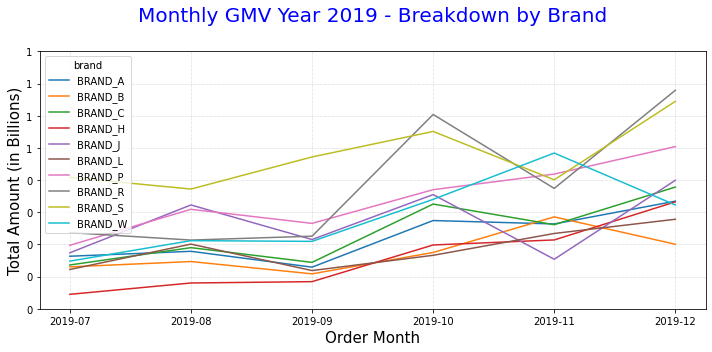

In [ ]:
# Buat Multi-Line Chart
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30,fontsize=20, color='blue') 
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

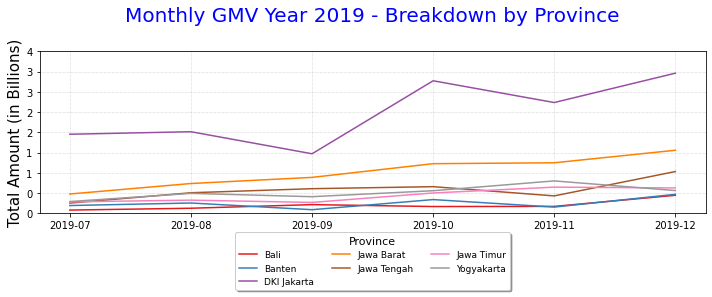

In [ ]:
plt.clf()
dataset.groupby(['order_month', 'province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

sudah terlihat cukup jelas jika kenaikan GMW disebabkan oleh provinsi. Berhubung kita fokusnya ke provinsi-provinsi yang GMV-nya besar, kalau begitu kita highlight untuk top 5 provinsi saja

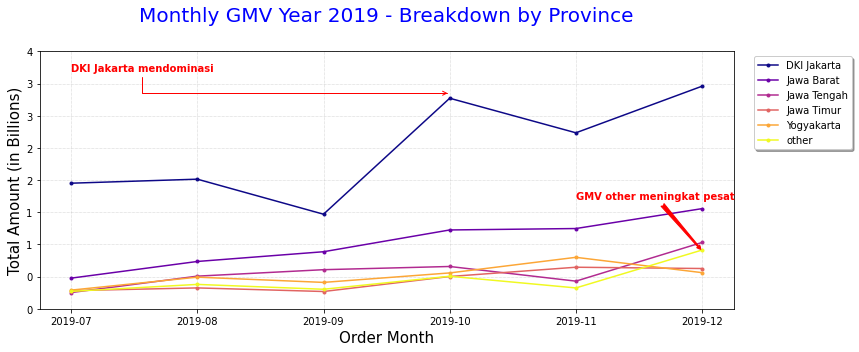

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000),
			 xytext=(4, 1700000000), weight='bold', color='red',
			 arrowprops=dict(arrowstyle='fancy',
							connectionstyle="arc3",
							color='red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
			 xytext=(0, 3700000000), weight='bold', color='red',
			 arrowprops=dict(arrowstyle='->',
							connectionstyle="angle",
							color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

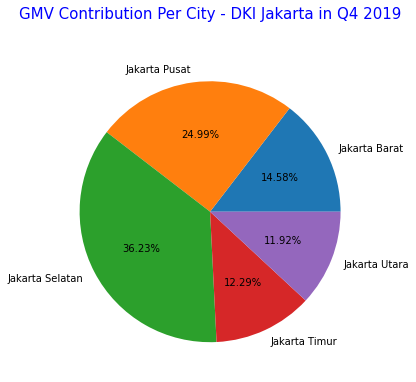

In [ ]:
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.show()

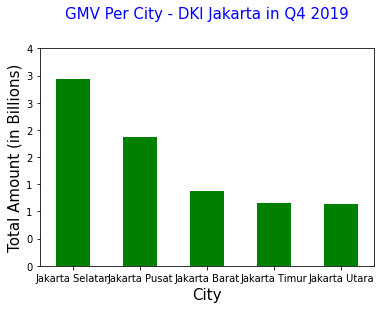

In [ ]:
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019',loc='center',pad=30,fontsize=15, color='blue')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize= 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

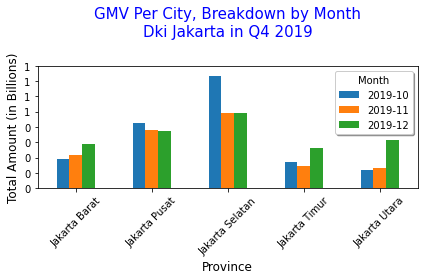

In [ ]:
dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDki Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize =12)	
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

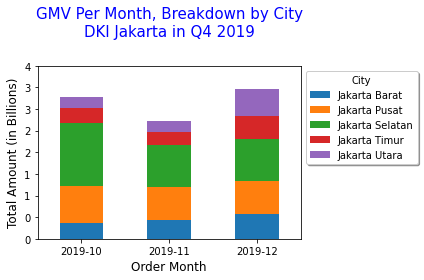

In [ ]:
dataset_dki_q4.groupby(['order_month', 'city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Mencari pola-pola menarik dari data customer di DKI Jakarta 

In [ ]:
#Membuat Agregat Data Customer
data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders',ascending=False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


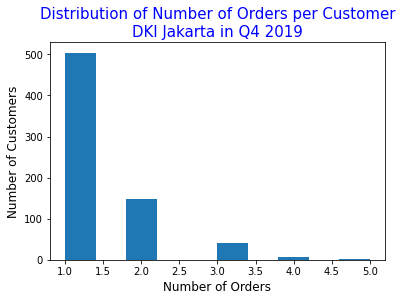

In [ ]:
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

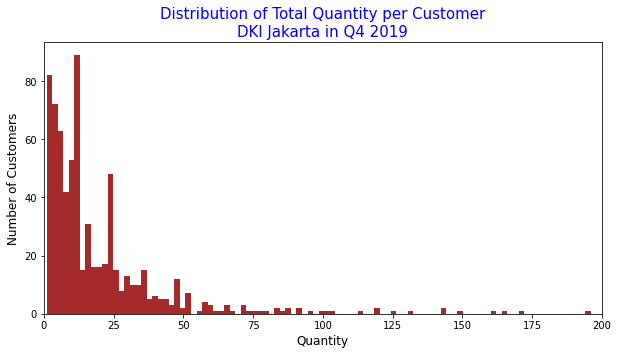

In [ ]:
data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))

plt.figure(figsize=(10, 5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Number of Customers',fontsize = 12)
plt.xlim(xmin=0,xmax=200)
plt.show()

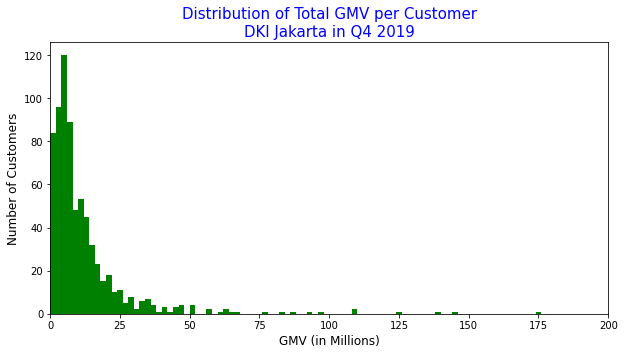

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize= 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0,xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

<Figure size 432x288 with 0 Axes>

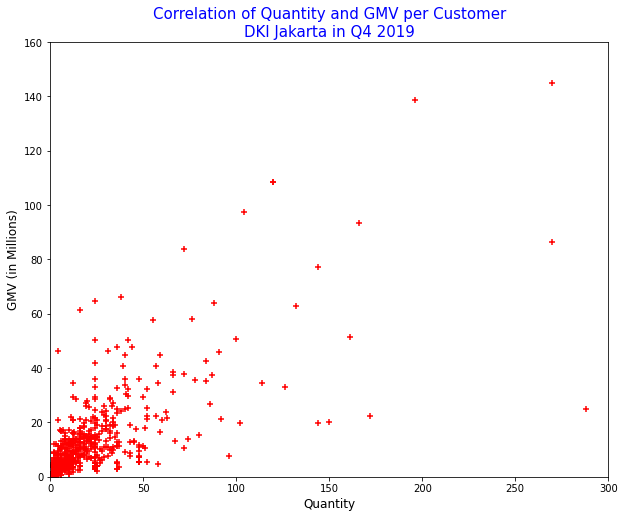

In [ ]:
plt.clf()
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize=12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

## Studi Kasus dari Senja: Daily number of customers on Desember
Dengan menggunakan dataset yang sama ('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv'), buatlah sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.

Beberapa spesifikasi yang harus diperhatikan:

Ukuran figure adalah 10x5
Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019
Sumbu-y adalah jumlah unique customers di tiap tanggal
Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri

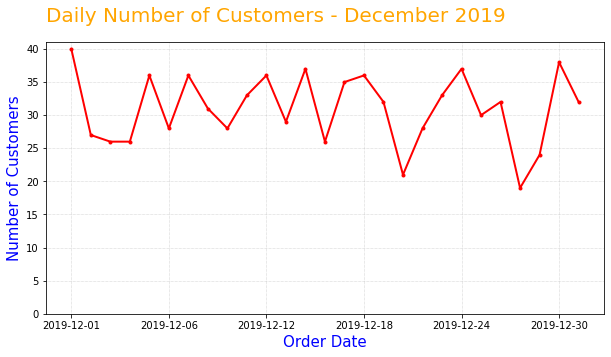

In [ ]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

In [ ]:
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='green')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()

In [ ]:
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()